In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [11]:
df['DateofTermination']=df['DateofTermination'].fillna("employed")

In [12]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

In [21]:
#valeur abberente sur les absences
Q1= df['Absences'].quantile(0.25)
Q3= df['Absences'].quantile(0.75)
IQR= Q3 - Q1
print(f"Les valeurs aberantes inferieurs sont: {df['Absences']< Q1-1.5*IQR}")

Les valeurs aberantes inferieurs sont: 0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Name: Absences, Length: 311, dtype: bool


In [23]:
print(f"et les valeurs aberantes superieur sont: {df['Absences'] > Q3+1.5*IQR}")

et les valeurs aberantes superieur sont: 0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Name: Absences, Length: 311, dtype: bool


In [24]:
#valeur abberente sur les absences
Q1= df['EngagementSurvey'].quantile(0.25)
Q3= df['EngagementSurvey'].quantile(0.75)
IQR= Q3 - Q1
print(f"Les valeurs aberantes inferieurs sont: {df['EngagementSurvey']< Q1-1.5*IQR}")

Les valeurs aberantes inferieurs sont: 0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Name: EngagementSurvey, Length: 311, dtype: bool


In [25]:
print(f"et les valeurs aberantes superieur sont: {df['EngagementSurvey'] > Q3+1.5*IQR}")

et les valeurs aberantes superieur sont: 0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Name: EngagementSurvey, Length: 311, dtype: bool


In [26]:
valeur_statistique = df['Absences'].describe()
print(f"Les valeurs statistiques des absences sont: {valeur_statistique}")

Les valeurs statistiques des absences sont: count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64


In [27]:
valeur_statistique = df['EngagementSurvey'].describe()
print(f"Les valeurs statistiques des performances sont: {valeur_statistique}")

Les valeurs statistiques des performances sont: count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64


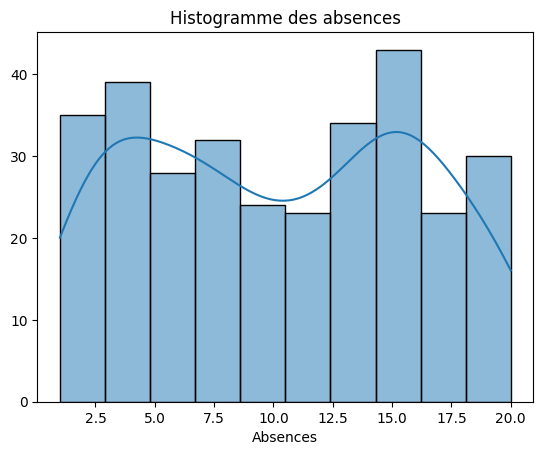

In [42]:
plt.Figure(figsize=(15, 8))
sns.histplot(df['Absences'] , bins=10 , kde=True)
plt.title('Histogramme des absences')
plt.ylabel('')
plt.show()

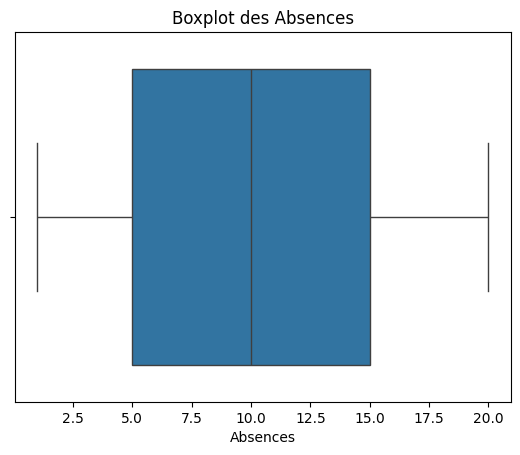

In [44]:
plt.Figure(figsize=(15, 15))
sns.boxplot(x=df['Absences'])
plt.title("Boxplot des Absences")
plt.xlabel('Absences')
plt.show()

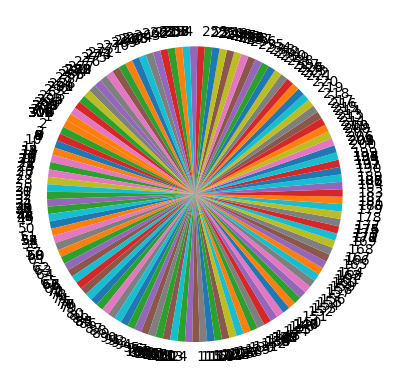

In [51]:
performance = df['MarriedID']
plt.Figure(figsize=(10, 15))
plt.pie(performance, labels= performance.index,  startangle= 150)
plt.show()

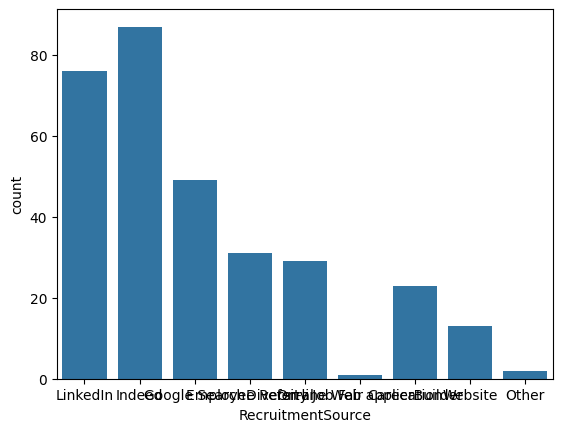

In [55]:
recrutement = df['RecruitmentSource']
plt.Figure(figsize=(100, 100))
sns.countplot(x='RecruitmentSource', data=df)
plt.show()